## Data



In [ ]:
from tensorflow.keras.datasets import mnist
import numpy as np
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [ ]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

## Model

![AE](https://blog.keras.io/img/ae/autoencoder_schema.jpg)

We will predict pixels (0,1). This can be seen as regression, or binary classification. Best is sigmoid output. 

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 32)                25120     
_________________________________________________________________
dense_1 (Dense)              (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________
None


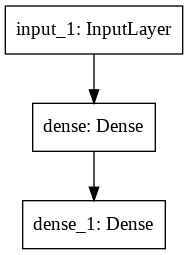

In [ ]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
print(autoencoder.summary())
plot_model(autoencoder)

Encoder

Model: "Encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 32)                25120     
Total params: 25,120
Trainable params: 25,120
Non-trainable params: 0
_________________________________________________________________
None


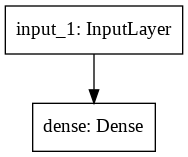

In [ ]:

# this model maps an input to its encoded representation
encoder = Model(input_img, encoded, name='Encoder')

print(encoder.summary())
plot_model(encoder)

Model: "Decoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32)]              0         
_________________________________________________________________
dense_1 (Dense)              (None, 784)               25872     
Total params: 25,872
Trainable params: 25,872
Non-trainable params: 0
_________________________________________________________________
None


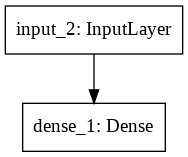

In [ ]:
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input), name='Decoder')

print(decoder.summary())
plot_model(decoder)

## Optimizer+Loss

Loss could be BCE or MSE.

/!\ Note:

If using tensorflow.keras with adadelta, the default learning rate has changed, so make sure to set to 1.0.

But Adam works much better! Adadelta is much slower.

In [ ]:
from tensorflow.keras import optimizers
#autoencoder.compile(optimizer=optimizers.Adadelta(lr=1.0), loss='binary_crossentropy')
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

## Fit

y=x!

In [ ]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
235/235 [==============================] - 1s 4ms/step - loss: 0.2780 - val_loss: 0.1870
Epoch 2/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1700 - val_loss: 0.1530
Epoch 3/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1442 - val_loss: 0.1337
Epoch 4/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1289 - val_loss: 0.1215
Epoch 5/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1186 - val_loss: 0.1130
Epoch 6/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1116 - val_loss: 0.1076
Epoch 7/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1067 - val_loss: 0.1031
Epoch 8/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1031 - val_loss: 0.1000
Epoch 9/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1003 - val_loss: 0.0975
Epoch 10/50
235/235 [==============================] - 1s 3ms/step - loss: 0.0982 - val_loss: 0.0957

## Generate

In [ ]:
# encode and decode some digits
# note that we take them from the *test* set
#encoded_imgs = encoder.predict(x_test)
#decoded_imgs = decoder.predict(encoded_imgs)
decoded_imgs = autoencoder.predict(x_test)

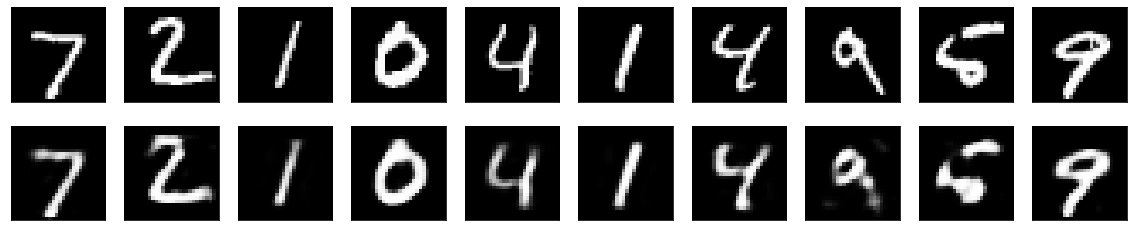

In [ ]:
# use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
encoded_imgs = encoder.predict(x_test)
print(encoded_imgs.mean())

8.875779


## MNIST basic model

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Layer_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
None


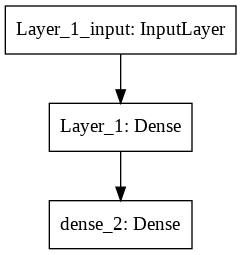

In [ ]:
from tensorflow.keras.models import Sequential
network = Sequential()
network.add(Dense(512, activation='relu', name='Layer_1', input_shape=(28 * 28,)))
network.add(Dense(10, activation='softmax'))
print(network.summary())
plot_model(network)

In [ ]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [ ]:
network.fit(x_train, y_train, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 1s 3ms/step - loss: 0.2542 - accuracy: 0.9261
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.1031 - accuracy: 0.9692
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0678 - accuracy: 0.9799
Epoch 4/5
469/469 [==============================] - 1s 2ms/step - loss: 0.0493 - accuracy: 0.9853
Epoch 5/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0382 - accuracy: 0.9886


In [ ]:
test_loss, test_acc = network.evaluate(x_test, y_test)
print(test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0665 - accuracy: 0.9809
0.98089998960495


## Unsupervised pre-training

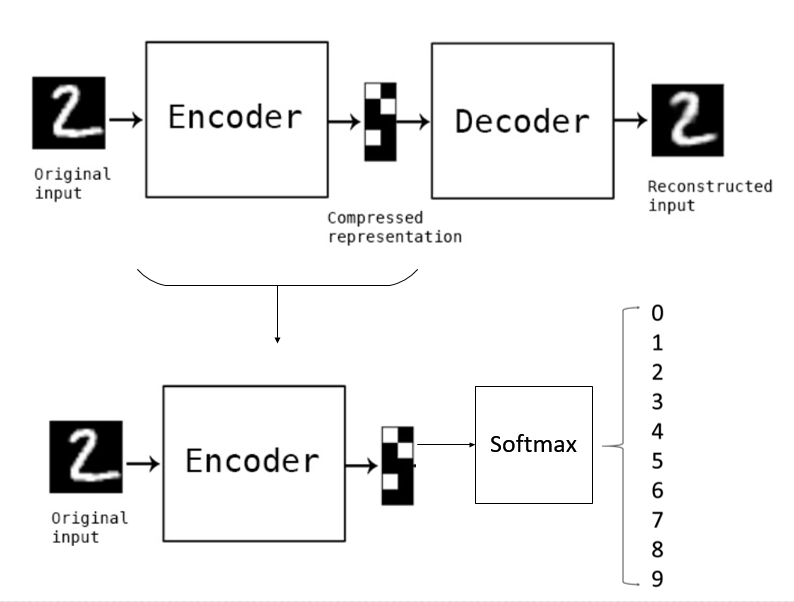

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
Encoder (Model)              (None, 32)                25120     
_________________________________________________________________
dense_3 (Dense)              (None, 512)               16896     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                5130      
Total params: 47,146
Trainable params: 47,146
Non-trainable params: 0
_________________________________________________________________
None


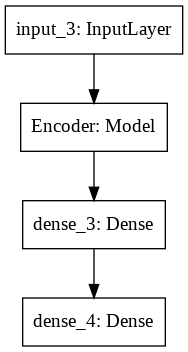

In [ ]:

input_img = Input(shape=(784,))
#x = Dense(512, activation='relu')(encoded)
encoded = encoder(input_img)
x = Dense(512, activation='relu')(encoded)
class_out = Dense(10, activation='softmax')(x)

classification_model = Model(input_img, class_out)

print(classification_model.summary())
plot_model(classification_model)

In [ ]:
classification_model.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [ ]:
classification_model.fit(x_train, y_train, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 1s 3ms/step - loss: 0.4829 - accuracy: 0.8603
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.1624 - accuracy: 0.9509
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.1100 - accuracy: 0.9659
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0865 - accuracy: 0.9731
Epoch 5/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0723 - accuracy: 0.9775


In [ ]:
test_loss, test_acc = classification_model.evaluate(x_test, y_test)
print(test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0902 - accuracy: 0.9722
0.9721999764442444


No big gain in accuracy

__But notice the difference in model size!__

Pre-trained encoder produces highly compressed features (32), compared to the baseline model (512). The model size is almost 1/10 of the original size.

That's because we made a sort of Transfer learning. We don't start from random initializations, but from features that knows how to reconstruct the input. So we don't need such big model, only classification layer.

## Sparse AE

In general, for any encoder, we want to encourage __sparsity__

See [visualization notebook](https://colab.research.google.com/drive/1Yxw8c5bq0eKU42uKOz-eh9_pcrHRXC2L). Late layers have less and more sparse activations.

The reason is that, late/deep layers tend to produce a _code_ of the input, which needs to be compressed, and encode the important features as much as possible.

![5.4_1_abstract_bicycle.png](https://github.com/ahmadelsallab/practical_dl/blob/master/Keras/notebooks/imgs/5.4_1_abstract_bicycle.png?raw=true)

According to this [tutorial](https://blog.keras.io/building-autoencoders-in-keras.html), this is equivalent to the code generate by dimensionality reduction techniques like PCA.

We can _enforce_ sparsity, by adding a _penalty_ on the activations of the last layer of the encoder (code). This can be achieved by the `activity_regularizer` parameter in keras. This is different from `kernel_regualizer`, which relates to limiting model capacity and reduce overfitting. However, `activity_regularizer` also has an effect in reducing overfitting, similar to `Dropout`.


In [ ]:
from tensorflow.keras import regularizers

encoding_dim = 32

input_img = Input(shape=(784,))
# add a Dense layer with a L1 activity regularizer
encoded = Dense(encoding_dim, activation='relu',
                activity_regularizer=regularizers.l1(10e-5))(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)

In [ ]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
235/235 [==============================] - 1s 4ms/step - loss: 0.2855 - val_loss: 0.2002
Epoch 2/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1788 - val_loss: 0.1607
Epoch 3/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1526 - val_loss: 0.1425
Epoch 4/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1379 - val_loss: 0.1307
Epoch 5/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1281 - val_loss: 0.1227
Epoch 6/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1213 - val_loss: 0.1170
Epoch 7/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1164 - val_loss: 0.1129
Epoch 8/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1129 - val_loss: 0.1100
Epoch 9/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1104 - val_loss: 0.1079
Epoch 10/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1087 - val_loss: 0.1065

Train loss is worse, since we add regularization intentionally.

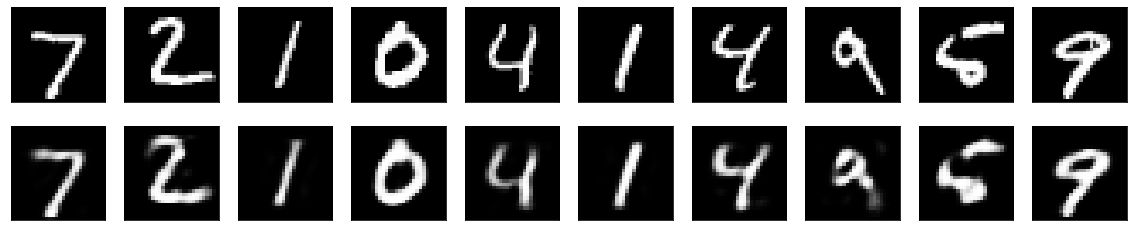

In [ ]:
decoded_imgs = autoencoder.predict(x_test)
# use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

No big difference.

But if we analyse the encoded_imgs, we will find the average activations is almost 1/2 that without regularization, which confirms the sparsity.

In [ ]:
encoded_imgs = encoder.predict(x_test)
print(encoded_imgs.mean())

4.8865914


Let's re-try now the pre-training scenario, with sparsity

In [ ]:

input_img = Input(shape=(784,))
#x = Dense(512, activation='relu')(encoded)
encoded = encoder(input_img)
x = Dense(512, activation='relu')(encoded)
class_out = Dense(10, activation='softmax')(x)

classification_model = Model(input_img, class_out)

classification_model.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
				
classification_model.fit(x_train, y_train, epochs=5, batch_size=128)

test_loss, test_acc = classification_model.evaluate(x_test, y_test)
print(test_acc)				

Epoch 1/5
469/469 [==============================] - 1s 3ms/step - loss: 0.2536 - accuracy: 0.9241
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.1105 - accuracy: 0.9660
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0822 - accuracy: 0.9744
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0673 - accuracy: 0.9787
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0912 - accuracy: 0.9718
0.9718000292778015


## Deep AE



Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_9 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_10 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_11 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_12 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_13 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_14 (Dense)             (None, 784)               1011

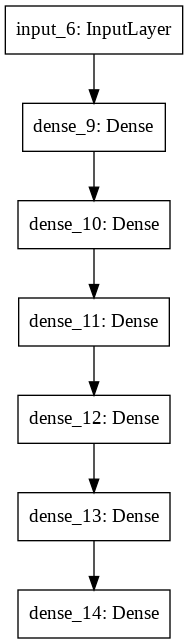

In [ ]:
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)
autoencoder = Model(input_img, decoded)
print(autoencoder.summary())
plot_model(autoencoder)

In [ ]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
235/235 [==============================] - 1s 4ms/step - loss: 0.2476 - val_loss: 0.1634
Epoch 2/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1483 - val_loss: 0.1337
Epoch 3/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1291 - val_loss: 0.1228
Epoch 4/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1211 - val_loss: 0.1162
Epoch 5/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1157 - val_loss: 0.1120
Epoch 6/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1115 - val_loss: 0.1078
Epoch 7/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1082 - val_loss: 0.1059
Epoch 8/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1059 - val_loss: 0.1034
Epoch 9/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1037 - val_loss: 0.1018
Epoch 10/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1018 - val_loss: 0.0995

Loss is lower on validation

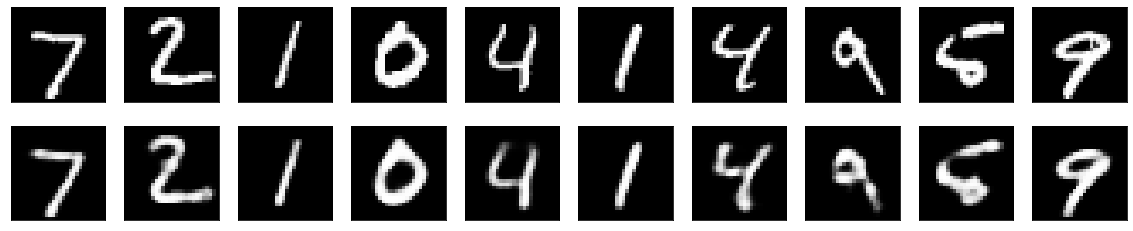

In [ ]:
decoded_imgs = autoencoder.predict(x_test)
# use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

Better reconstruction

Let's re-try the pre-training

Model: "Encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_9 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_10 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_11 (Dense)             (None, 32)                2080      
Total params: 110,816
Trainable params: 110,816
Non-trainable params: 0
_________________________________________________________________
None


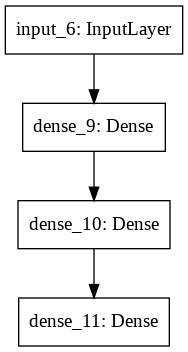

In [ ]:
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded, name='Encoder')

print(encoder.summary())
plot_model(encoder)

In [ ]:

input_img = Input(shape=(784,))
#x = Dense(512, activation='relu')(encoded)
encoded = encoder(input_img)
x = Dense(512, activation='relu')(encoded)
class_out = Dense(10, activation='softmax')(x)

classification_model = Model(input_img, class_out)

classification_model.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
				
classification_model.fit(x_train, y_train, epochs=5, batch_size=128)

test_loss, test_acc = classification_model.evaluate(x_test, y_test)
print(test_acc)				

Epoch 1/5
469/469 [==============================] - 1s 3ms/step - loss: 0.3115 - accuracy: 0.9036
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.1186 - accuracy: 0.9637
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0870 - accuracy: 0.9726
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0701 - accuracy: 0.9781
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0881 - accuracy: 0.9743
0.9743000268936157


Much better, still smaller model size (1/4) of the model without Encoder

## Convolutional autoencoder

This is much like a SS model:

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 8)           584       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 8)           0   

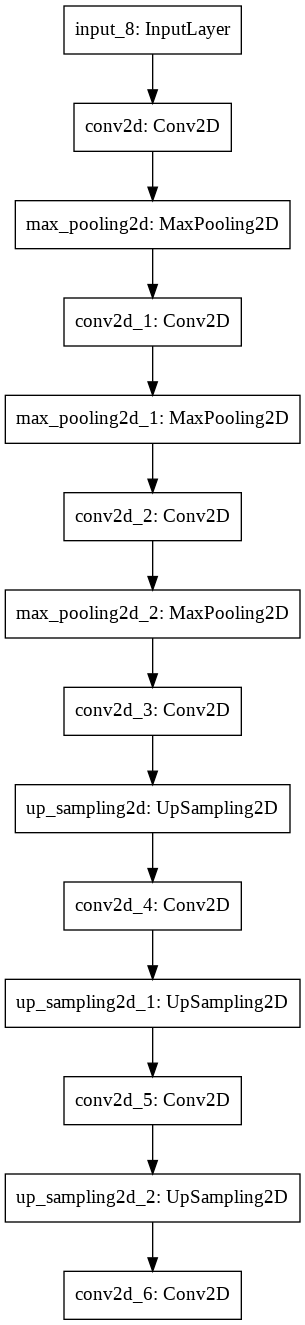

In [ ]:
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K

input_img = Input(shape=(28, 28, 1))  # adapt this if using `channels_first` image data format

x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)

decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
print(autoencoder.summary())
plot_model(autoencoder)

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  # adapt this if using `channels_first` image data format


y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:

autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
469/469 [==============================] - 3s 5ms/step - loss: 0.2403 - val_loss: 0.1486
Epoch 2/50
469/469 [==============================] - 2s 5ms/step - loss: 0.1384 - val_loss: 0.1277
Epoch 3/50
469/469 [==============================] - 2s 5ms/step - loss: 0.1240 - val_loss: 0.1189
Epoch 4/50
469/469 [==============================] - 2s 5ms/step - loss: 0.1177 - val_loss: 0.1141
Epoch 5/50
469/469 [==============================] - 2s 5ms/step - loss: 0.1136 - val_loss: 0.1114
Epoch 6/50
469/469 [==============================] - 2s 5ms/step - loss: 0.1106 - val_loss: 0.1082
Epoch 7/50
469/469 [==============================] - 2s 5ms/step - loss: 0.1084 - val_loss: 0.1063
Epoch 8/50
469/469 [==============================] - 2s 5ms/step - loss: 0.1068 - val_loss: 0.1046
Epoch 9/50
469/469 [==============================] - 2s 5ms/step - loss: 0.1054 - val_loss: 0.1033
Epoch 10/50
469/469 [==============================] - 2s 5ms/step - loss: 0.1039 - val_loss: 0.1018

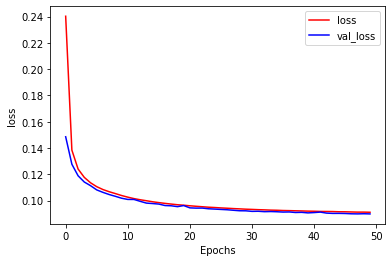

In [ ]:
import matplotlib.pyplot as plt
epochs = range(50)
val_loss = autoencoder.history.history['val_loss']
train_loss = autoencoder.history.history['loss']

# b+ is for "blue cross"
plt.plot(epochs, train_loss, 'r', label='loss')
# "bo" is for "blue dot"
plt.plot(epochs, val_loss, 'b', label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()

plt.show()

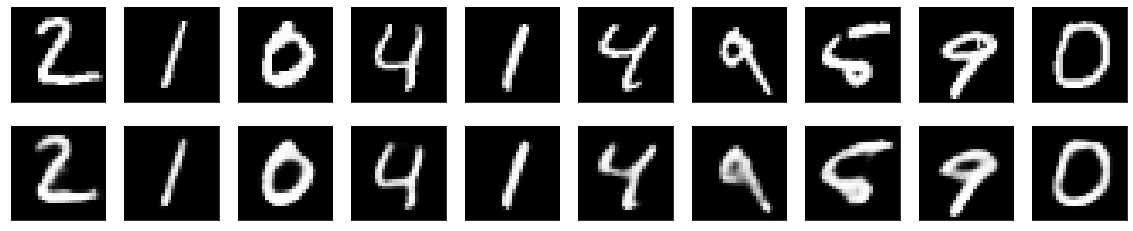

In [ ]:
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1,n+1):
    # display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

We can also have a look at the 128-dimensional encoded representations. These representations are 8x4x4, so we reshape them to 4x32 in order to be able to display them as grayscale images.

In [ ]:
encoded_imgs.shape

(10000, 32)

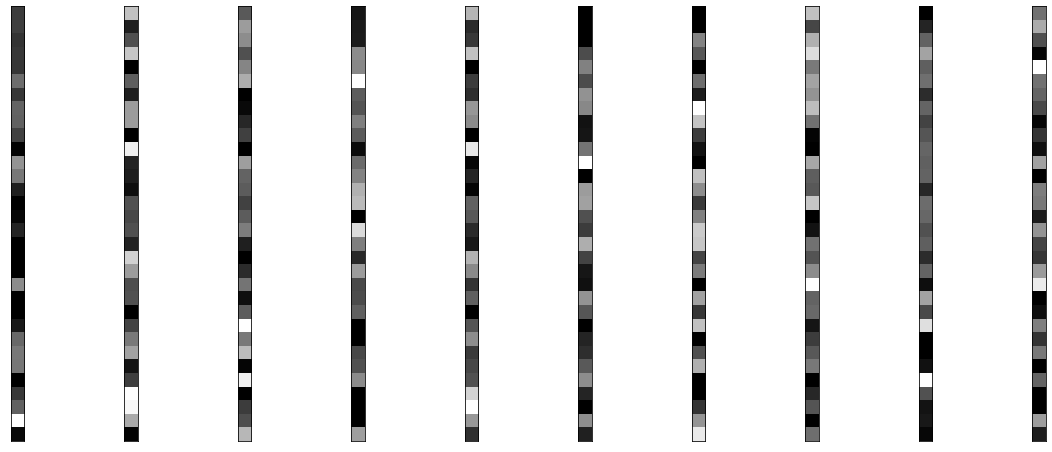

In [ ]:
n = 10
plt.figure(figsize=(20, 8))
for i in range(1,n+1):
    ax = plt.subplot(1, n, i)
    plt.imshow(encoded_imgs[i].reshape(-1, 4 * 8).T)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

Basic ConvNet on MNIST

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 64)               

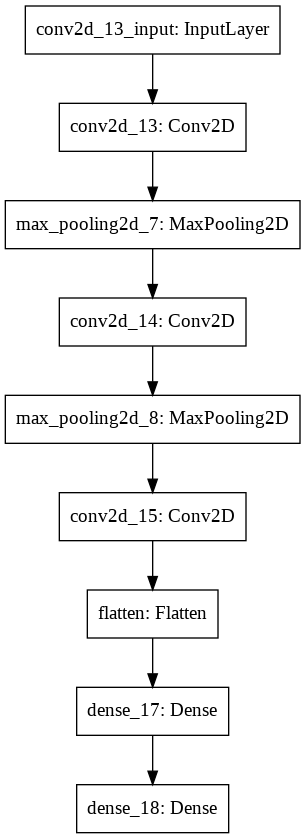

In [ ]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))
print(model.summary())
plot_model(model)

In [ ]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 3s 4ms/step - loss: 0.1679 - accuracy: 0.9474
Epoch 2/5
938/938 [==============================] - 3s 3ms/step - loss: 0.0466 - accuracy: 0.9854
Epoch 3/5
938/938 [==============================] - 3s 3ms/step - loss: 0.0320 - accuracy: 0.9900
Epoch 4/5
938/938 [==============================] - 3s 4ms/step - loss: 0.0235 - accuracy: 0.9928
Epoch 5/5
938/938 [==============================] - 3s 4ms/step - loss: 0.0185 - accuracy: 0.9943


In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0316 - accuracy: 0.9901
0.9901000261306763


With pre-training

Model: "Encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 8)           584       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 8)           0   

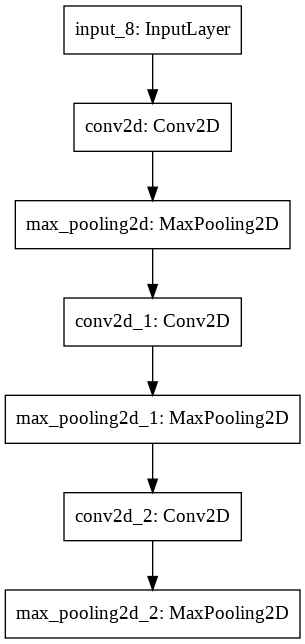

In [ ]:
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded, name='Encoder')

print(encoder.summary())
plot_model(encoder)

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Encoder (Model)              (None, 4, 4, 8)           1904      
_________________________________________________________________
flatten_3 (Flatten)          (None, 128)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 512)               66048     
_________________________________________________________________
dense_24 (Dense)             (None, 10)                5130      
Total params: 73,082
Trainable params: 73,082
Non-trainable params: 0
_________________________________________________________________
None


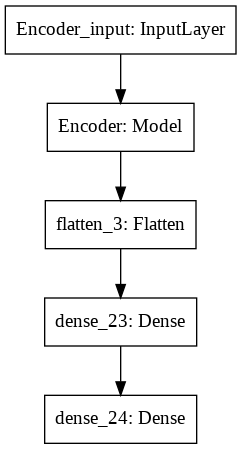

In [ ]:

from tensorflow.keras.models import Sequential

model = Sequential()
model.add(encoder)
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))
print(model.summary())
plot_model(model)

In [ ]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 3s 3ms/step - loss: 0.0914 - accuracy: 0.9714
Epoch 2/5
938/938 [==============================] - 3s 3ms/step - loss: 0.0484 - accuracy: 0.9853
Epoch 3/5
938/938 [==============================] - 3s 3ms/step - loss: 0.0398 - accuracy: 0.9874
Epoch 4/5
938/938 [==============================] - 3s 3ms/step - loss: 0.0334 - accuracy: 0.9895
Epoch 5/5
938/938 [==============================] - 3s 3ms/step - loss: 0.0297 - accuracy: 0.9914


In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0383 - accuracy: 0.9882
0.9882000088691711


## Denosing AE (DAE)

Sometimes referred to as Stacked DAE (sDAE).

Two interpretations:

- Application to image denoising
- Encourage the AE NOT to copy the input, i.e. learn identity mapping.

In [ ]:
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  # adapt this if using `channels_first` image data format

noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

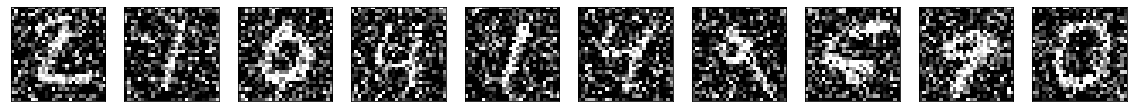

In [ ]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(1,n+1):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
input_img = Input(shape=(28, 28, 1))  # adapt this if using `channels_first` image data format

x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (7, 7, 32)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
autoencoder.fit(x_train_noisy, x_train,
                epochs=100,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

Epoch 1/100
469/469 [==============================] - 3s 6ms/step - loss: 0.1649 - val_loss: 0.1164
Epoch 2/100
469/469 [==============================] - 3s 5ms/step - loss: 0.1131 - val_loss: 0.1078
Epoch 3/100
469/469 [==============================] - 3s 5ms/step - loss: 0.1073 - val_loss: 0.1043
Epoch 4/100
469/469 [==============================] - 2s 5ms/step - loss: 0.1045 - val_loss: 0.1023
Epoch 5/100
469/469 [==============================] - 3s 5ms/step - loss: 0.1027 - val_loss: 0.1007
Epoch 6/100
469/469 [==============================] - 3s 5ms/step - loss: 0.1013 - val_loss: 0.0999
Epoch 7/100
469/469 [==============================] - 3s 5ms/step - loss: 0.1001 - val_loss: 0.0987
Epoch 8/100
469/469 [==============================] - 3s 5ms/step - loss: 0.0993 - val_loss: 0.0980
Epoch 9/100
469/469 [==============================] - 2s 5ms/step - loss: 0.0986 - val_loss: 0.0977
Epoch 10/100
469/469 [==============================] - 3s 5ms/step - loss: 0.0980 - val_lo

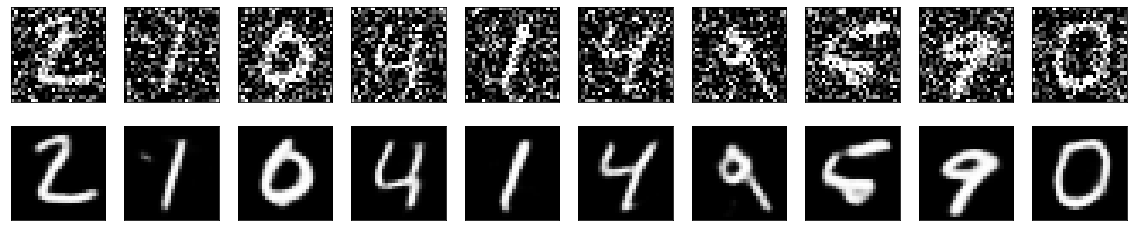

In [ ]:
decoded_imgs = autoencoder.predict(x_test_noisy)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1,n+1):
    # display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

Interesting application for docs denoising on [Kaggle](https://www.kaggle.com/c/denoising-dirty-documents)

## Variational autoencoder (VAE)

The learned low dimensional _code_ is also called __latent factor__ (z).

In VAE, instead of learning arbitrary z, we learn the parameters of a probabilistic model distribution of z. This is Gaussian.

This encourages _multi-modal_ modeling of the z space. In other words, if the code holds multiple categories to sample from (as the case with MNIST), this will be enabled by the Gaussian models (we will have multiple peaks of the distribution, or _modes_, each represents a category mean).

Full process:

![VAE](https://blog.bayeslabs.co/assets/img/vae-gaussian.png)

In [ ]:
#%tensorflow_version 1.x
#import tensorflow as tf
#tf.__version__

TensorFlow 1.x selected.


In [ ]:
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
from tensorflow.keras.utils import plot_model

In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import numpy as np
(x_train, y_train), (x_test, y_test) = mnist.load_data()
'''
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  # adapt this if using `channels_first` image data format
'''
image_size = x_train.shape[1]
original_dim = image_size * image_size
x_train = np.reshape(x_train, [-1, original_dim])
x_test = np.reshape(x_test, [-1, original_dim])
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

#y_train = to_categorical(y_train)
#y_test = to_categorical(y_test)

In [ ]:
# network parameters
input_shape = (original_dim, )
intermediate_dim = 512
batch_size = 128
latent_dim = 2
epochs = 50

First, an encoder network turns the input samples `x` into two parameters in a latent space, which we will note `z_mean` and `z_log_sigma`. 

In [ ]:
# VAE model = encoder + decoder
# build encoder model
inputs = Input(shape=input_shape, name='encoder_input')
x = Dense(intermediate_dim, activation='relu')(inputs)
z_mean = Dense(latent_dim, name='z_mean')(x)
z_log_var = Dense(latent_dim, name='z_log_var')(x)

We can use these parameters to sample new similar points from the latent space:

In [ ]:
# reparameterization trick
# instead of sampling from Q(z|X), sample epsilon = N(0,I)
# z = z_mean + sqrt(var) * epsilon
def sampling(args):
    """Reparameterization trick by sampling from an isotropic unit Gaussian.
    # Arguments
        args (tensor): mean and log of variance of Q(z|X)
    # Returns
        z (tensor): sampled latent vector
    """

    z_mean, z_log_var = args
    batch = K.shape(z_mean)[0]
    dim = K.int_shape(z_mean)[1]
    # by default, random_normal has mean = 0 and std = 1.0
    epsilon = K.random_normal(shape=(batch, dim))
    return z_mean + K.exp(0.5 * z_log_var) * epsilon

In [ ]:
from tensorflow.keras.layers import Lambda

# use reparameterization trick to push the sampling out as input
# note that "output_shape" isn't necessary with the TensorFlow backend
z = Lambda(sampling, output_shape=(latent_dim,), name='z')([z_mean, z_log_var])

Model: "encoder"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      [(None, 784)]        0                                            
__________________________________________________________________________________________________
dense_6 (Dense)                 (None, 512)          401920      encoder_input[0][0]              
__________________________________________________________________________________________________
z_mean (Dense)                  (None, 2)            1026        dense_6[0][0]                    
__________________________________________________________________________________________________
z_log_var (Dense)               (None, 2)            1026        dense_6[0][0]                    
____________________________________________________________________________________________

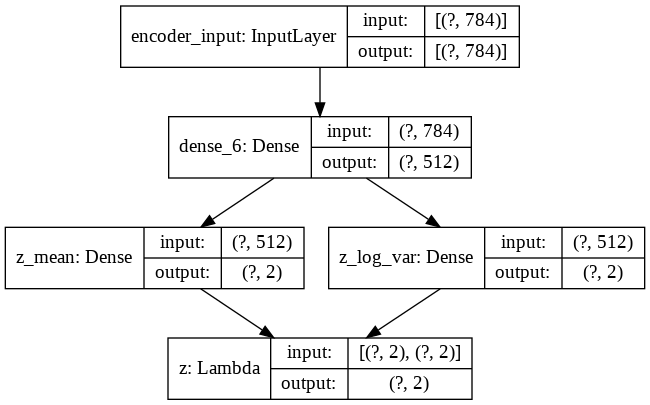

In [ ]:
# instantiate encoder model
encoder = Model(inputs, [z_mean, z_log_var, z], name='encoder')
print(encoder.summary())
plot_model(encoder, to_file='vae_mlp_encoder.png', show_shapes=True)

Finally, we can map these sampled latent points back to reconstructed inputs:

In [ ]:
# build decoder model
latent_inputs = Input(shape=(latent_dim,), name='z_sampling')
x = Dense(intermediate_dim, activation='relu')(latent_inputs)
outputs = Dense(original_dim, activation='sigmoid')(x)


Model: "decoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
z_sampling (InputLayer)      [(None, 2)]               0         
_________________________________________________________________
dense_7 (Dense)              (None, 512)               1536      
_________________________________________________________________
dense_8 (Dense)              (None, 784)               402192    
Total params: 403,728
Trainable params: 403,728
Non-trainable params: 0
_________________________________________________________________
None


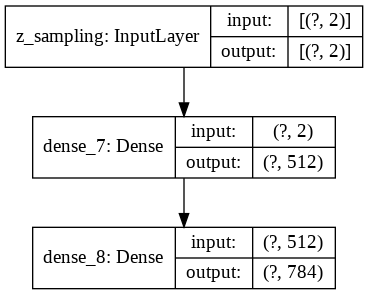

In [ ]:
# instantiate decoder model
decoder = Model(latent_inputs, outputs, name='decoder')
print(decoder.summary())
plot_model(decoder, to_file='vae_mlp_decoder.png', show_shapes=True)

What we've done so far allows us to instantiate 3 models:

- an end-to-end autoencoder mapping inputs to reconstructions
- an encoder mapping inputs to the latent space
- a generator that can take points on the latent space and will output the corresponding reconstructed samples.

Model: "vae_mlp"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder_input (InputLayer)   [(None, 784)]             0         
_________________________________________________________________
encoder (Model)              [(None, 2), (None, 2), (N 403972    
_________________________________________________________________
decoder (Model)              (None, 784)               403728    
Total params: 807,700
Trainable params: 807,700
Non-trainable params: 0
_________________________________________________________________
None


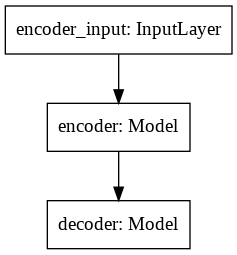

In [ ]:
# instantiate VAE model
outputs = decoder(encoder(inputs)[2])
vae = Model(inputs, outputs, name='vae_mlp')
print(vae.summary())
plot_model(vae)

__Loss__

We train the model using the end-to-end model, with a custom loss function: 

_the sum of a reconstruction term, and the KL divergence regularization term._

KL divergence can be understood as simialrity measure between two distributions.
We want to encourage the decoding/sampling distribution, to be the same as the encoding distribution. 


In [ ]:
from tensorflow.keras.losses import mse, binary_crossentropy
#reconstruction_loss = mse(inputs, outputs)
reconstruction_loss = binary_crossentropy(inputs, outputs)
reconstruction_loss *= original_dim

In [ ]:
kl_loss = 1 + z_log_var - K.square(z_mean) - K.exp(z_log_var)
kl_loss = K.sum(kl_loss, axis=-1)
kl_loss *= -0.5

In [ ]:
#@tensorflow.function
vae_loss = K.mean(reconstruction_loss + kl_loss)
vae.add_loss(vae_loss)
#vae.compile(optimizer='adam', loss=vae_loss)
vae.compile(optimizer='adam')

In [ ]:
vae.fit(x_train,
        shuffle=True,
        epochs=epochs,
        batch_size=batch_size,
        validation_data=(x_test, None))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 2s 41us/sample - loss: 201.2372 - val_loss: 173.3650
Epoch 2/50
60000/60000 [==============================] - 2s 27us/sample - loss: 170.0247 - val_loss: 167.6629
Epoch 3/50
60000/60000 [==============================] - 2s 28us/sample - loss: 166.5586 - val_loss: 165.6368
Epoch 4/50
60000/60000 [==============================] - 2s 28us/sample - loss: 164.4869 - val_loss: 163.9294
Epoch 5/50
60000/60000 [==============================] - 2s 27us/sample - loss: 162.8395 - val_loss: 162.4174
Epoch 6/50
60000/60000 [==============================] - 2s 28us/sample - loss: 161.3898 - val_loss: 161.2765
Epoch 7/50
60000/60000 [==============================] - 2s 28us/sample - loss: 160.0969 - val_loss: 160.2348
Epoch 8/50
60000/60000 [==============================] - 2s 27us/sample - loss: 158.8918 - val_loss: 158.8022
Epoch 9/50
60000/60000 [==============================] - 2s 2

Because our latent space is two-dimensional, there are a few cool visualizations that can be done at this point. One is to look at the neighborhoods of different classes on the latent 2D plane:

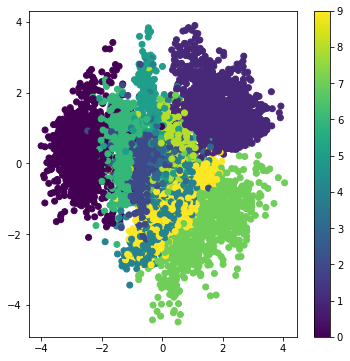

In [ ]:
import matplotlib.pyplot as plt

x_test_encoded,_,_ = encoder.predict(x_test, batch_size=batch_size)
plt.figure(figsize=(6, 6))
plt.scatter(x_test_encoded[:, 0], x_test_encoded[:, 1], c=y_test)
plt.colorbar()
plt.show()

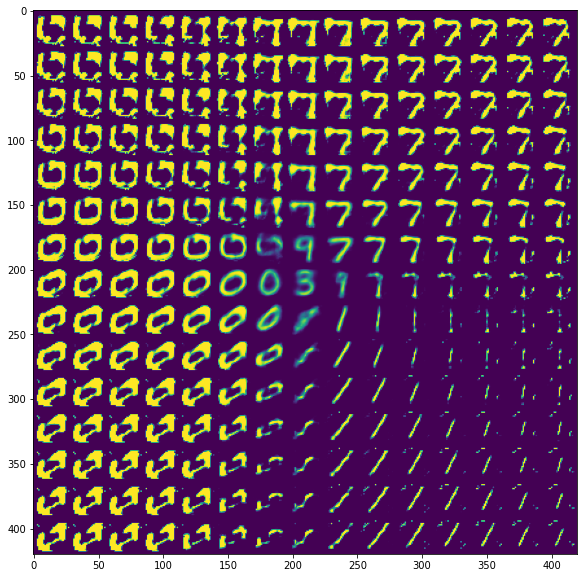

In [ ]:
# display a 2D manifold of the digits
n = 15  # figure with 15x15 digits
digit_size = 28
figure = np.zeros((digit_size * n, digit_size * n))
# we will sample n points within [-15, 15] standard deviations
grid_x = np.linspace(-15, 15, n)
grid_y = np.linspace(-15, 15, n)

for i, yi in enumerate(grid_x):
    for j, xi in enumerate(grid_y):
        z_sample = np.array([[xi, yi]])# * epsilon_std
        x_decoded = decoder.predict(z_sample)
        digit = x_decoded[0].reshape(digit_size, digit_size)
        figure[i * digit_size: (i + 1) * digit_size,
               j * digit_size: (j + 1) * digit_size] = digit

plt.figure(figsize=(10, 10))
plt.imshow(figure)
plt.show()

# References
- https://blog.keras.io/building-autoencoders-in-keras.html